<a href="https://colab.research.google.com/github/phuongtruong282/Student-Habits-vs-Academic-Performance/blob/main/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **1. DATA OVERVIEW**

In [2]:
# Importing necessary libraries for data manipulation, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset from a raw GitHub URL into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/phuongtruong282/Student-Habits-vs-Academic-Performance/refs/heads/main/student_habits_performance.csv')

In [4]:
# Displaying the first five rows of the DataFrame
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
# Displaying a summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

# **2. DATA CLEANING**

In [6]:
# Counting the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [7]:
# Counting the number of missing (null) values in each column of the DataFrame
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [8]:
# Filling missing values in the 'parental_education_level' column with the most frequent value (mode)
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [9]:
# Check unique values in categorical data
categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality','extracurricular_participation']

for col in categorical_columns:
    print(f"Unique values of {col}:")
    print(df[col].unique())

Unique values of gender:
['Female' 'Male' 'Other']
Unique values of part_time_job:
['No' 'Yes']
Unique values of diet_quality:
['Fair' 'Good' 'Poor']
Unique values of parental_education_level:
['Master' 'High School' 'Bachelor']
Unique values of internet_quality:
['Average' 'Poor' 'Good']
Unique values of extracurricular_participation:
['Yes' 'No']


In [10]:
# Converting all categorical columns in the DataFrame to the 'category' data type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [11]:
# Review a summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   category
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   category
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   category
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   category
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       1000 non-null   category
 12  internet_quality               1000

In [12]:
# Generating summary statistics for numerical columns in the DataFrame
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [13]:
# Outlier Detection & Removal using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [14]:
# Apply to selected numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [15]:
# Review a summary of the DataFrame structure after handling outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     977 non-null    category
 1   age                            977 non-null    int64   
 2   gender                         977 non-null    category
 3   study_hours_per_day            977 non-null    float64 
 4   social_media_hours             977 non-null    float64 
 5   netflix_hours                  977 non-null    float64 
 6   part_time_job                  977 non-null    category
 7   attendance_percentage          977 non-null    float64 
 8   sleep_hours                    977 non-null    float64 
 9   diet_quality                   977 non-null    category
 10  exercise_frequency             977 non-null    int64   
 11  parental_education_level       977 non-null    category
 12  internet_quality               977 non-nu

In [16]:
# Saving the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

#**3. EXPLORATORY DATA ANALYSIS**

## **Summary Statistics**




In [17]:
# 1. Summary Statistics
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,20.501535,3.525998,2.482600,1.802047,84.126817,6.464688,3.041965,5.442170,69.474923
std,2.309160,1.435070,1.150429,1.057407,9.321584,1.220535,2.024258,2.852771,16.669262
min,17.000000,0.000000,0.000000,0.000000,59.500000,3.200000,0.000000,1.000000,26.200000
25%,19.000000,2.500000,1.700000,1.000000,77.900000,5.600000,1.000000,3.000000,58.500000
50%,20.000000,3.500000,2.500000,1.800000,84.300000,6.500000,3.000000,5.000000,70.300000
75%,23.000000,4.500000,3.300000,2.500000,90.900000,7.300000,5.000000,8.000000,81.000000
max,24.000000,7.300000,5.600000,4.600000,100.000000,9.800000,6.000000,10.000000,100.000000


**Observations**
- Average exam score: 69.5 (range: 26.2 → 100.0)
- Average study time: 3.53 hours/day, with some students studying 0 hours and others up to 7.3 hours
- Average social media use: 2.5 hours/day (up to 5.6 hours)
- Average netflix use: 1.8 hours/day (up to 4.6 hours)
- Average attendance: 84.1% (up to 100%)
- Average sleep: 6.5 hours (minimum 3.2h, maximum 9.8h)
- Average exercise: 3 (range: 0 -> 6)
- Average mental health rating: 5.4 (range: 1 -> 10)

## **Exploring the distribution of objective variable**

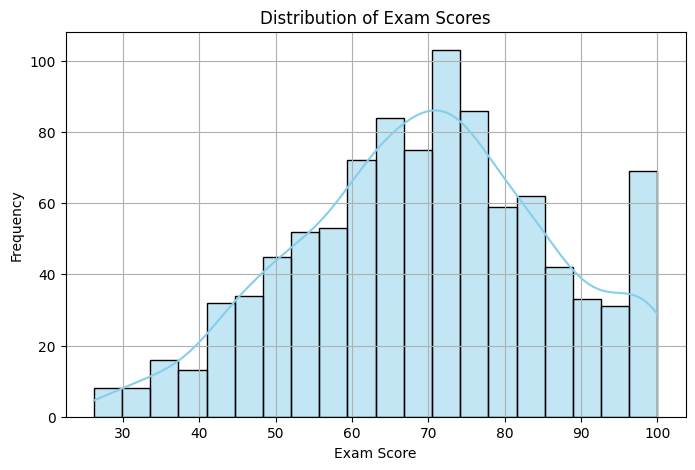

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation**
- The distribution is fairly normal, with a slight left skew (a slight skew toward lower scores).

- Many students have exam scores ranging from 60 to 80.

- Some students scored very low (20-30), while others achieved a perfect score of 100.

## **Correlation Analysis**

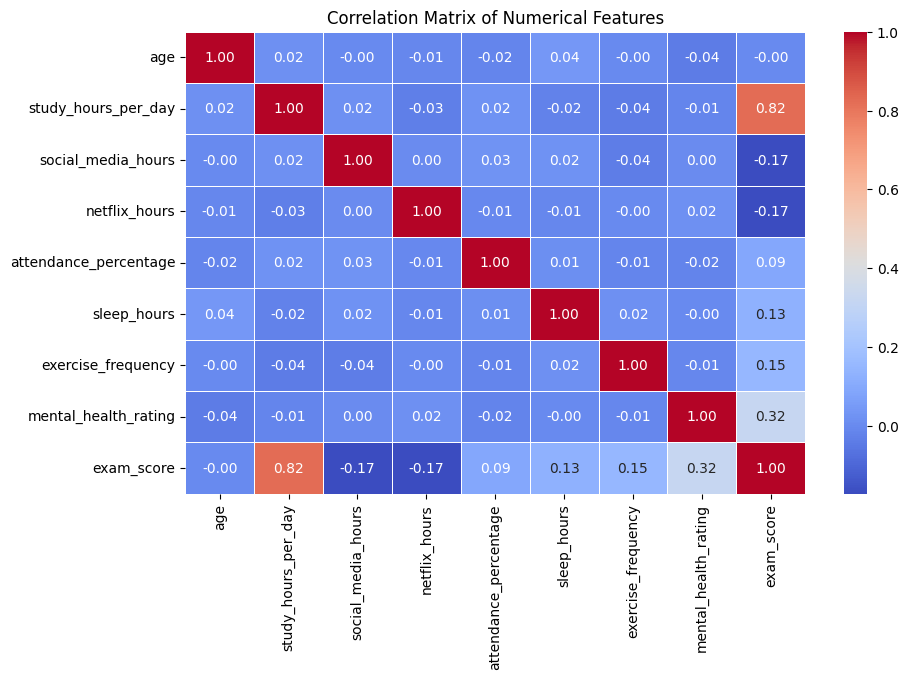

In [19]:
# Computing the correlation matrix for numeric variables
corr_matrix = df[numeric_cols].corr()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Key Correlations:**
- exam_Score and study_hours_per_day: +0.82 Very strong => Studying more is closely associated with higher exam scores.
- exam_score and mental_health_rating: +0.32 Moderate => Better mental health tends to support more effective learning.
- exam_score and exercise_frequency: +0.15 	Weak => Regular exercise has a slight positive effect.
- exam_score and sleep_hours: +0.13 Weak => Sleep enough has a slight positive effect.
- exam_score and social_media_hours/netflix_hours: -0.17 Weak – There is a slight negative correlation, suggesting that spending more time for social media or watching more Netflix tends to be associated with lower exam scores.

**Conclusion**

- Study hours have the strongest impact on exam performance.

- Mental health is the only health-related factor with a noticeable correlation to academic success.

- Sleep and exercise play a role but are not strongly influential – further analysis is needed, especially by comparing high vs. low performers.
- There is a weak negative correlation between entertainment time (Netflix, social media) and exam scores. This suggests that spending too much time on leisure may slightly reduce academic performance. While not a direct cause, it highlights the importance of balancing study and entertainment for better results.

## Exploring the relationship between exam score and study habits

The study habits are:
- study_hours_per_day
- social_media_hours
- netflix_hours
- part_time_job
- attendance_percentage
- extracurricular_participation.


For further information, refer to the ReadME file at the Exploring the relationship between exam score and study habits.

## Exploring the relationship between exam score and health habits

The health habits are:
- sleep_hours
- diet_quality
- exercise_frequency
- mental_health_rating

For further information, refer to the ReadME file at the Exploring the relationship between exam score and health habits.

## Exploring the relationship between exam score and related environmental factors

The elated environmental factors are:
- parental_education_level
- internet_quality

<ipython-input-20-532f223376b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_education_level', y='exam_score', data=df, palette='Set2')


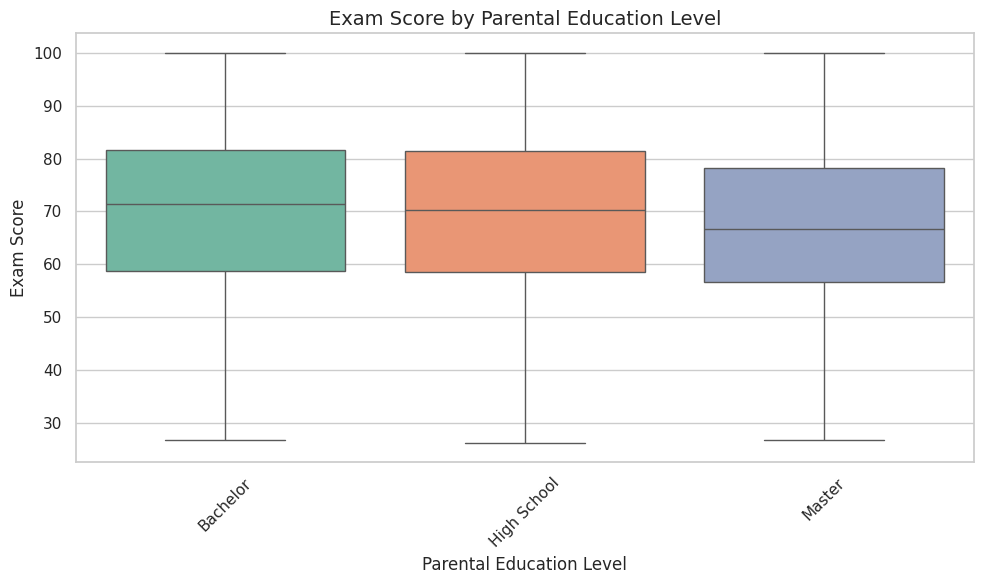

In [20]:
# Set general style
sns.set(style="whitegrid")

# Boxplot 1: Parental Education Level vs Exam Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_education_level', y='exam_score', data=df, palette='Set2')
plt.title('Exam Score by Parental Education Level', fontsize=14)
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Observations**
- There are three groups: Master, High School, and Bachelor.

- The Bachelor group has the highest median score (72), followed by High School, and lastly Master (66).

- The score distribution of the Master group is skewed toward lower scores.

- The Bachelor group tends to have higher scores, with more stable distribution.


**Conclusion:**
- The group with parents holding a Bachelor's or High School education has a slightly higher median score compared to the Master's group, which is contrary to common expectations.This could be due to other factors such as expectations or pressure.
=> Parental education level does not have a linear relationship with exam results. It may have an indirect influence, but it is not a determining factor.

<ipython-input-21-ebe619868bad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='internet_quality', y='exam_score', data=df, palette='Set3')


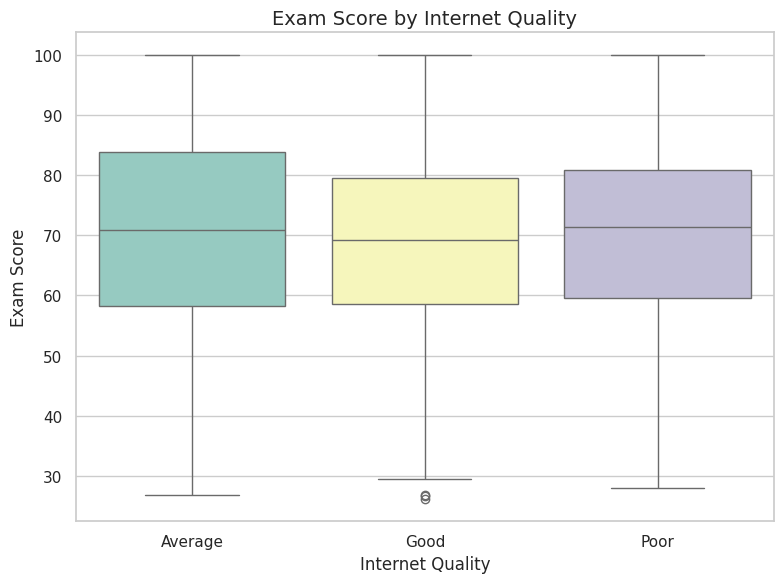

In [21]:
# Boxplot 2: Internet Quality vs Exam Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='internet_quality', y='exam_score', data=df, palette='Set3')
plt.title('Exam Score by Internet Quality', fontsize=14)
plt.xlabel('Internet Quality')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()


**Observations**
- All three groups (Poor, Average, Good) have similar median scores (around 70).

- The Average group has the highest median, followed by Poor, and lastly Good (which is surprising, as expectations usually suggest the opposite).


**Conclusion:**
- Internet quality does not have a clear or consistent impact on exam scores. Students with "Good" Internet do not necessarily achieve higher scores.

- This suggests that Internet quality is not a direct determining factor in academic performance—students may use the Internet for various purposes, not just for studying.

#**4.DATA MODELING**

## Preprocessing

In [22]:
# Import necessary libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [23]:
# Drop student ID column
df.drop(columns=['student_id'], inplace=True, errors='ignore')

In [24]:
# Define the target variable
y = df['exam_score']
X = df.drop(['exam_score'], axis=1)


In [25]:
# Define types of categorical variables
# Ordinal variables (with meaningful order)
ordered_cols = ['diet_quality', 'parental_education_level', 'internet_quality']

# Binary nominal variables (no order, 2 categories)
binary_cols = ['gender', 'part_time_job', 'extracurricular_participation']

# Numeric columns (detect automatically)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ordered_cols + binary_cols]


In [26]:
# Label Encoding for ordinal features
label_encoders = {}
for col in ordered_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [27]:
# One-Hot Encoding for binary variables
X = pd.get_dummies(X, columns=binary_cols, drop_first=True)

In [28]:
# Standardize numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [29]:
# Combine all features into the final dataset
final_features = num_cols + ordered_cols + [col for col in X.columns if col not in num_cols + ordered_cols]
X_final = X[final_features]


In [30]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                977 non-null    float64
 1   study_hours_per_day                977 non-null    float64
 2   social_media_hours                 977 non-null    float64
 3   netflix_hours                      977 non-null    float64
 4   attendance_percentage              977 non-null    float64
 5   sleep_hours                        977 non-null    float64
 6   exercise_frequency                 977 non-null    float64
 7   mental_health_rating               977 non-null    float64
 8   diet_quality                       977 non-null    int64  
 9   parental_education_level           977 non-null    int64  
 10  internet_quality                   977 non-null    int64  
 11  gender_Male                        977 non-null    bool   
 12 

In [31]:
# Convert all boolean columns to integers (0/1)
X_final = X_final.astype({col: int for col in X_final.select_dtypes(include='bool').columns})

##Predictive Modeling

In [32]:
# Add a constant to the predictor variable set to represent the intercept
X_final = sm.add_constant(X_final)

In [33]:
model = sm.OLS(y, X_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     605.5
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        13:41:06   Log-Likelihood:                -2988.3
No. Observations:                 977   AIC:                             6009.
Df Residuals:                     961   BIC:                             6087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Recalculating regression**

In [34]:
significant_vars = ['const', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                    'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

X_reduced = X_final[significant_vars]
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1300.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        13:41:06   Log-Likelihood:                -2991.1
No. Observations:                 977   AIC:                             5998.
Df Residuals:                     969   BIC:                             6037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    69.47

## Evaluating the Model

In [35]:
X_reduced = X_final[significant_vars]
# Split train-test using the selected important variables
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

In [36]:
# Predict on the test set
y_pred = model_reduced.predict(X_test)


In [37]:
# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 26.64920684067223
rmse: 5.162286977752421
